<Labels layer 'outlines' at 0x27e2b4e5790>

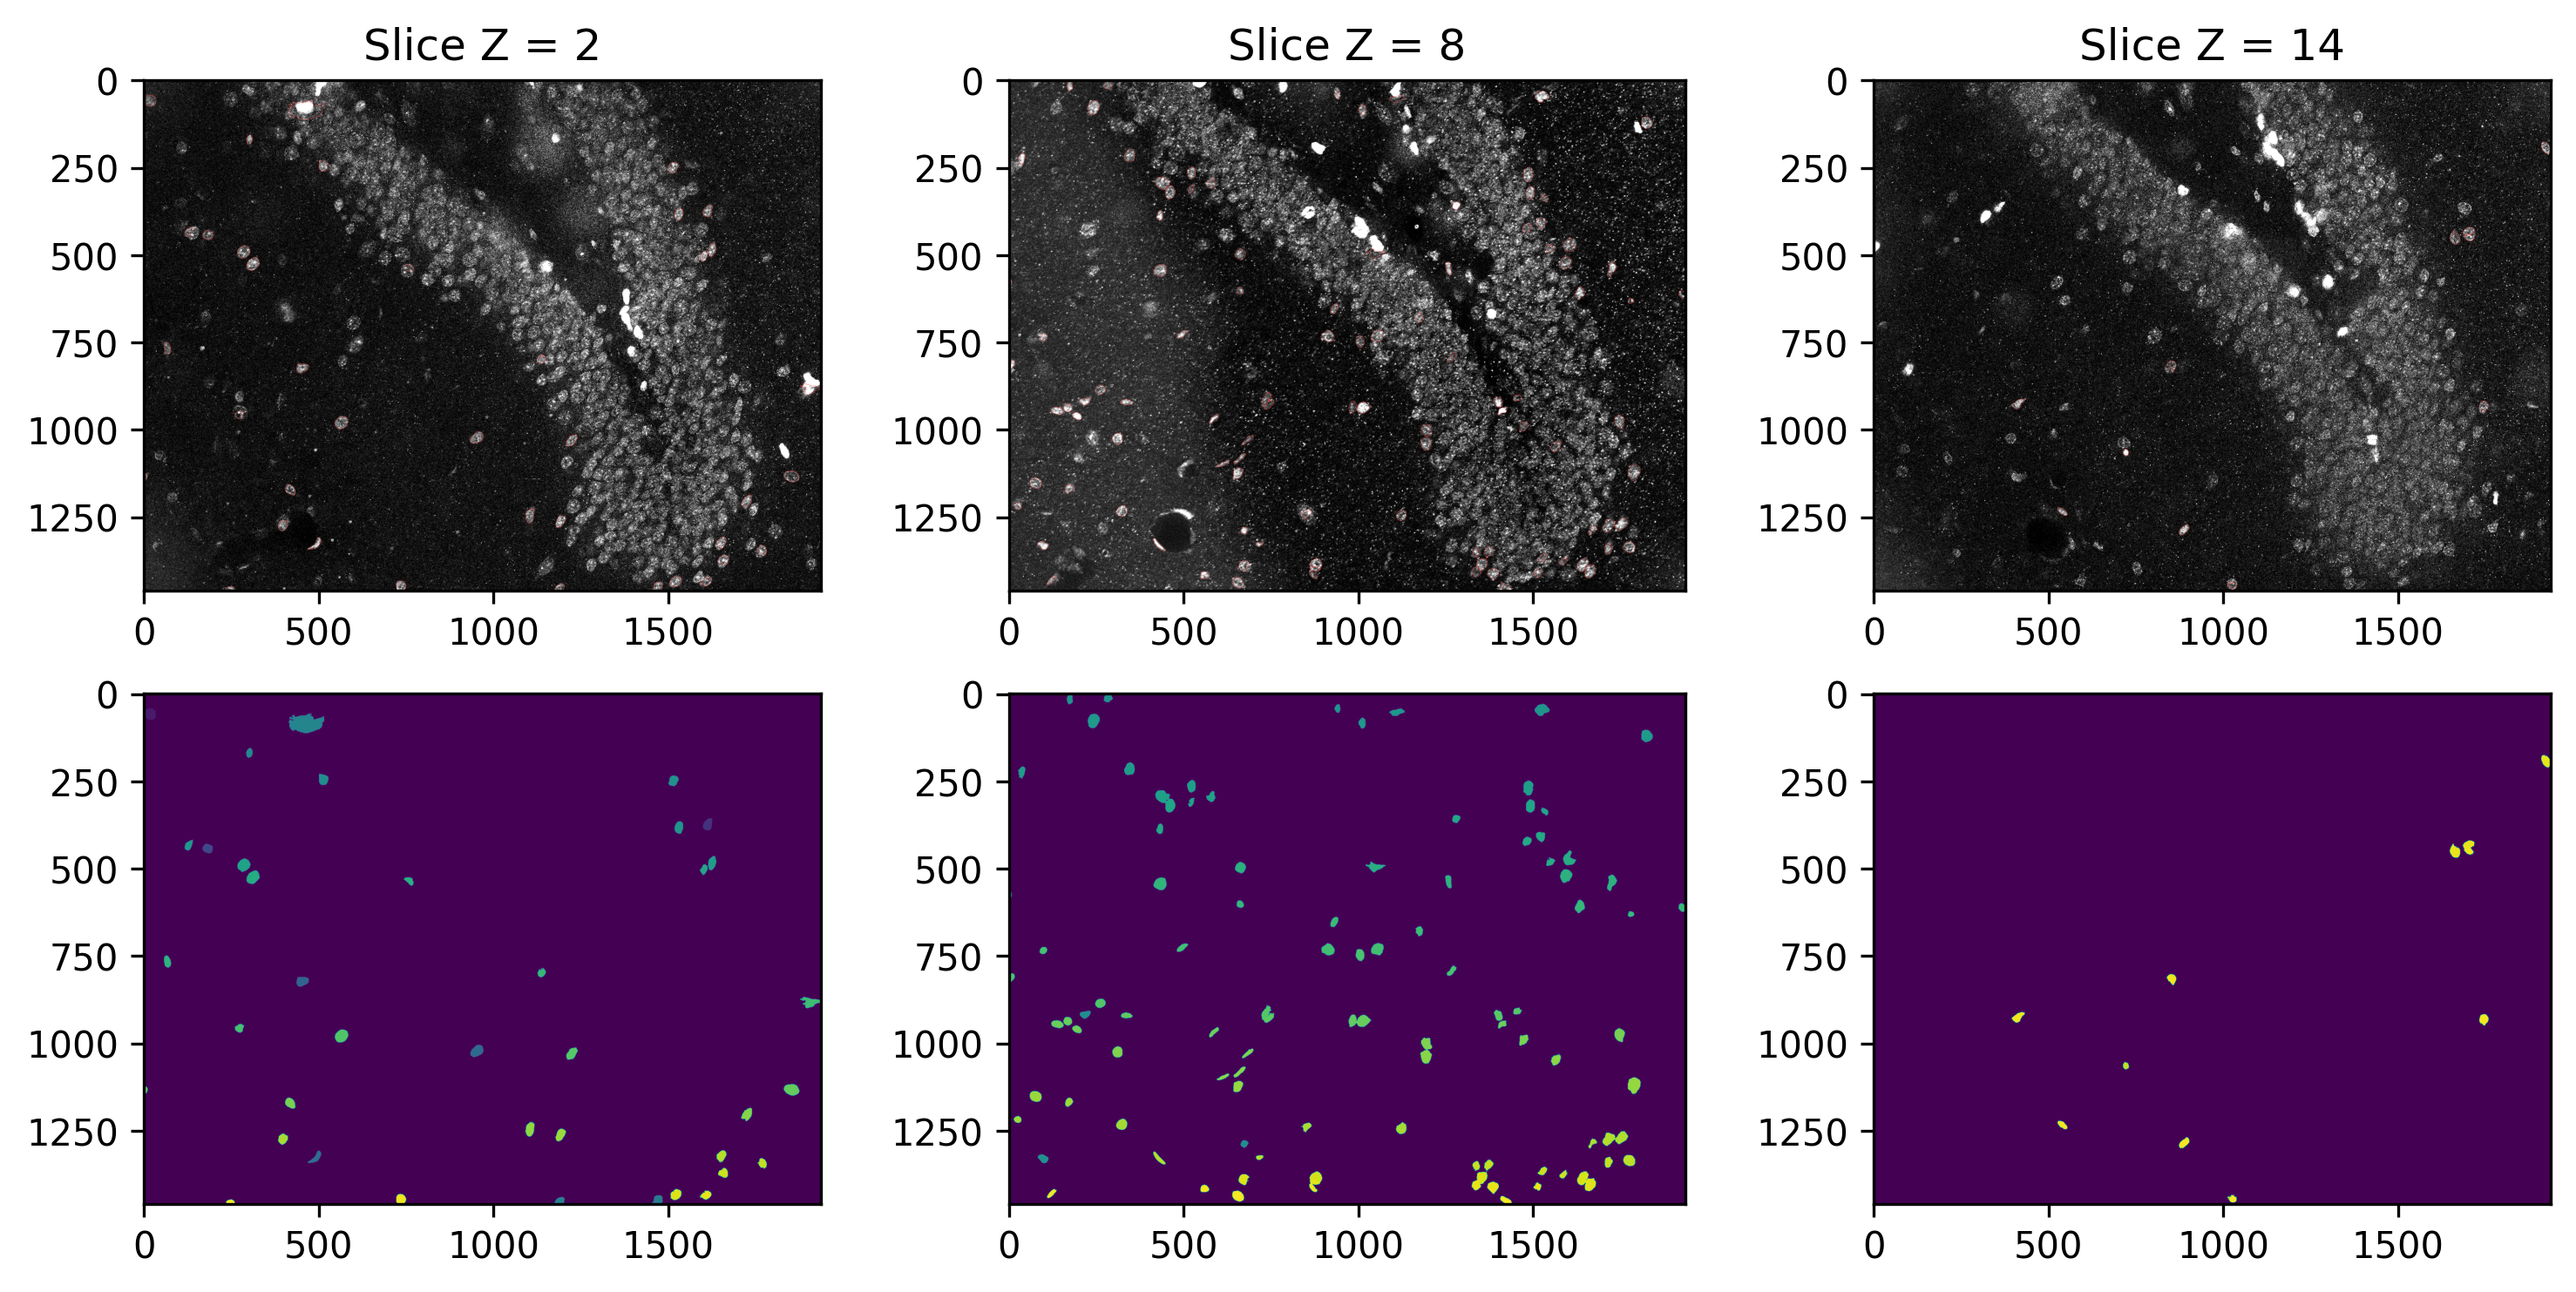

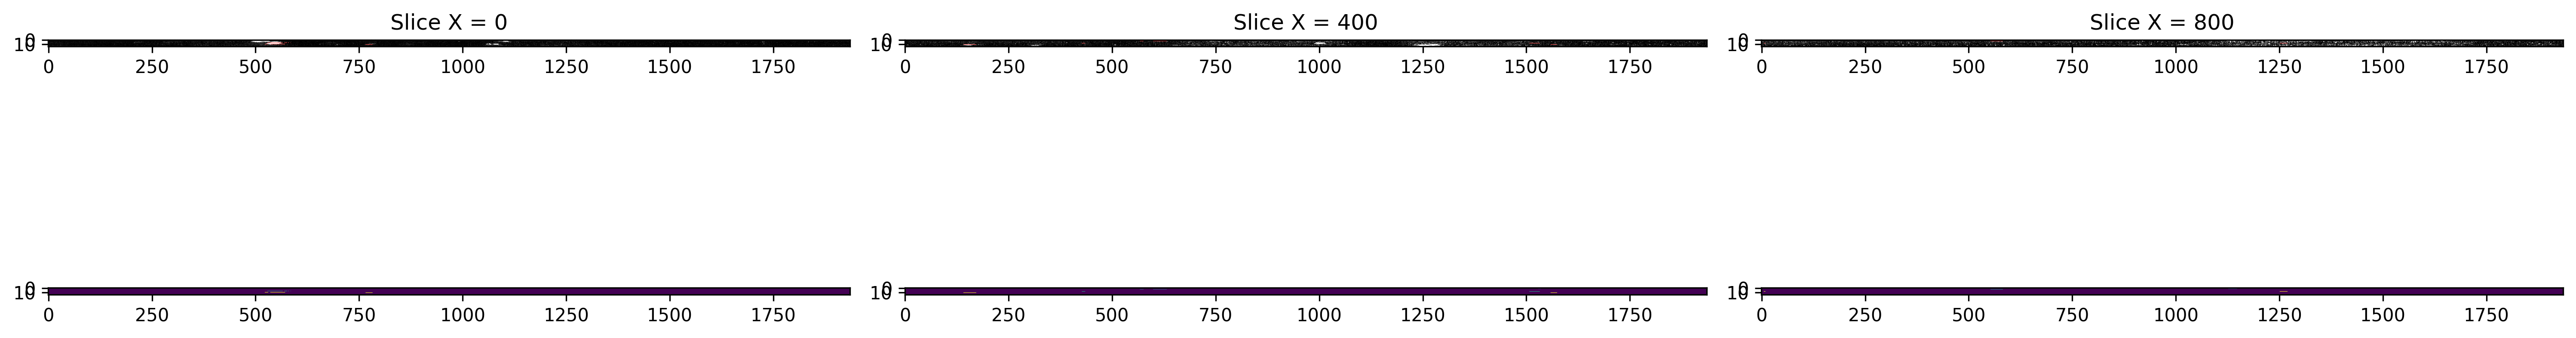

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import time, os, sys
import skimage.io 
from cellpose import models, utils, plot, io 
import matplotlib as mpl
import napari 
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(model_type='cyto', gpu = True) #nuclei model for brdu

img = skimage.io.imread(r"C:\Users\paulw\OneDrive\Dokumente\BA NSC FoxOs\cellposeTest\C4-021221_FoxO_NSC_runner_NestinAMCA_MCM2AF488_bGalCy3_BrdUCy5_Slide18_Slice1H2a-nobg.tif")
filename = "BrdU-021221_FoxO_NSC_runner_Slide18_Slice1H2a-nobg.tif"
# channel to segment and nuclear channel 
# numbering starts at 1 
# for your single channel image use [0, 0] 
# for the multi channel image it's [3, 0]
channels = [0, 0] 
diameter = 30 

masks_stitched, flows_stitched, styles_stitched, _ = model.eval(img, # the input image 
                                                                channels=channels , 
                                                                diameter=diameter, 
                                                                net_avg=True,
                                                                #normalize = False, #testing this for BrdU
                                                                min_size=30, #minimum nr of pixels per mask
                                                                cellprob_threshold = 0.2, #4.2 for MCM2, #normal threshhold, 0.0; -6 to +6; higher = more restrictive
                                                                flow_threshold = 0.4, #0.35 for MCM2, #wrong shapes, higher > less restrictive
                                                                anisotropy = 6.6, #Z sampling is 6.6 times less dense, 0.227*6.6=1.5
                                                                do_3D=False, # This runs the code with the 2D algorithm, stitching slices as described here https://cellpose.readthedocs.io/en/latest/inputs.html 
                                                                stitch_threshold=0.3)


 # save results so you can load in gui
io.masks_flows_to_seg(img, masks_stitched, flows_stitched, diameter, filename, channels)
    
# This code is tough to interpret, sorry! 
# plot in XY 
plt.figure(figsize=(20,5), tight_layout=True)
for i,iplane in enumerate(np.arange(2,15,6,int)):
    img0 = plot.image_to_rgb(img[iplane, :].copy(), channels=[0])
    plt.subplot(2,6,i+1)
    outlines = utils.masks_to_outlines(masks_stitched[iplane])
    outX, outY = np.nonzero(outlines)
    imgout= img0.copy()
    imgout[outX, outY] = np.array([255,75,75])
    plt.imshow(imgout)
    plt.title('Slice Z = %d'%iplane)
    plt.subplot(2, 6, (i+7))
    plt.imshow(masks_stitched[iplane])

# plot in XZ: this is REALLY important to check cells are being assigned correctly 
plt.figure(figsize=(40,4), tight_layout=True)
for i,iplane in enumerate(np.arange(0,1200,400,int)):
    img0 = plot.image_to_rgb(img[:, iplane].copy(), channels=[0]) 
    plt.subplot(2,6,i+1)
    outlines = utils.masks_to_outlines(masks_stitched[:, iplane])
    outX, outY = np.nonzero(outlines)
    imgout= img0.copy()
    imgout[outX, outY] = np.array([255,75,75])
    plt.imshow(imgout)
    plt.title('Slice X = %d'%iplane)
    plt.subplot(2, 6, (i+7))
    plt.imshow(masks_stitched[:, iplane])
    
 #check not as plots but with napari as viewer   
img = skimage.io.imread(r"C:\Users\paulw\OneDrive\Dokumente\BA NSC FoxOs\cellposeTest\C4-021221_FoxO_NSC_runner_NestinAMCA_MCM2AF488_bGalCy3_BrdUCy5_Slide18_Slice1H2a-nobg.tif")
outlines = utils.masks_to_outlines(masks_stitched)
viewer = napari.Viewer() 
viewer.add_image(img) 
viewer.add_labels(masks_stitched) 
viewer.add_labels(outlines)